In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.utils import class_weight

In [3]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
#from keras.preprocessing import sequence
#from keras.initializers import glorot_uniform
np.random.seed(1)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(epochs, loss, val_loss):
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(epochs), loss, label='loss')
    plt.plot(np.arange(epochs), val_loss, label='val_loss')
    plt.legend()
    plt.grid(True)
def acc_graph(epochs, train_acc, val_acc):
    x_axis = np.linspace(1, epochs, num=epochs)
    
    plt.figure(figsize=(10, 7))
    plt.plot(x_axis, train_acc, color='g', lw=3, alpha=0.7, label='Train Accuracy')
    plt.plot(x_axis, val_acc, color='orange', lw=3, alpha=0.7, label='Val Accuracy')
    plt.title('Accuracy graph')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

In [5]:
def calculation_classes(y, y_test = None):
    print ('\t\tTRAIN DATA\tTEST DATA')
    print ('Negative\t', np.sum(y==0),'  ',
           round(100*np.sum(y==0)/y.shape[0],2),'%',
           '\t',np.sum(y_test==0),'  ',
           round(100*np.sum(y_test==0)/y_test.shape[0],2),'%'
           '\nPositive\t ', np.sum(y==1),' ',
           round(100*np.sum(y==1)/y.shape[0],2),'%'
           '\t',np.sum(y_test==1),' ',
           round(100*np.sum(y_test==1)/y_test.shape[0],2),'%'
      )

In [6]:
#from utils import model

In [16]:
from keras.models import Model
from keras.layers import Dense, Input, GRU


def model_GRU(input_shape, Ty):
    i = Input(shape=input_shape, dtype='float32')
    X = GRU(16, return_sequences=False)(i)
    #X = LSTM(16, return_sequences=Flase)(i)
    X = Dense(Ty, activation='sigmoid')(X)
    model = Model(inputs=[i], outputs=X)
    
    return model


# Import data sets

In [85]:
data_train = pd.read_csv('sources/train.csv')
data_test = pd.read_csv('sources/test_v7_v8.csv')

In [90]:
data_test = pd.read_csv('sources/test_v3.csv')
test = data_test.values

In [91]:
X = data_train.drop(['Y'], axis='columns').values
y = data_train['Y'].values

X_train,X_dev,y_train,y_dev = train_test_split(X, y, test_size=0.2, \
                                               random_state=227, shuffle=True, stratify=y)
X_test = data_test.values
test = data_test.values
print(len(X_test))


class_weights_train = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y), y)
#print(class_weights_train)
calculation_classes(y, y_dev)

71
		TRAIN DATA	TEST DATA
Negative	 1173    79.53 % 	 235    79.66 %
Positive	  302   20.47 %	 60   20.34 %


In [92]:
ss = StandardScaler()

X = ss.fit_transform(X)
X_train = ss.fit_transform(X_train)
ss_params = ss.get_params()
print(ss_params)
X_dev = ss.transform(X_dev)

X_test = ss.transform(X_test)


{'copy': True, 'with_mean': True, 'with_std': True}


In [93]:
X = np.expand_dims(X, axis=2)
X_train = np.expand_dims(X_train, axis=2)
X_dev = np.expand_dims(X_dev, axis=2)

print(X_test.shape)
X_test = np.expand_dims(X_test, axis=2)
print(X_test.shape)

(71, 6)
(71, 6, 1)


# NN on train/dev sets

In [70]:
Tx=  6
Ty = 1
epochs = 350
batch_size = 16

In [71]:
GRU_model = model_GRU((Tx,1),Ty)
#LSTM_model.summary()
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
logs = GRU_model.fit(X_train, y_train , epochs=epochs, batch_size=batch_size, shuffle=True,\
               validation_data=(X_dev, y_dev), verbose=0, class_weight=class_weights_train)

In [72]:
#print(GRU_model.summary())

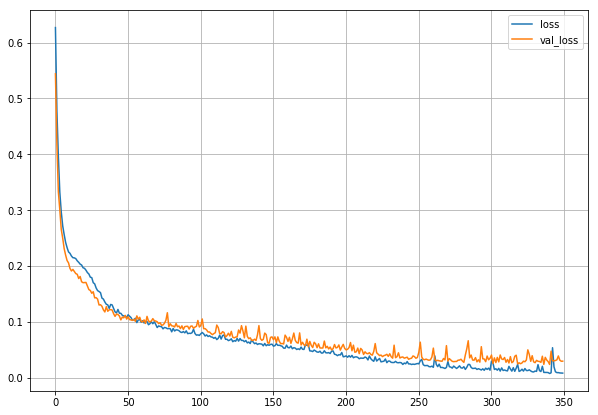

In [73]:
plot_loss(epochs, logs.history.get('loss'), logs.history.get('val_loss'))

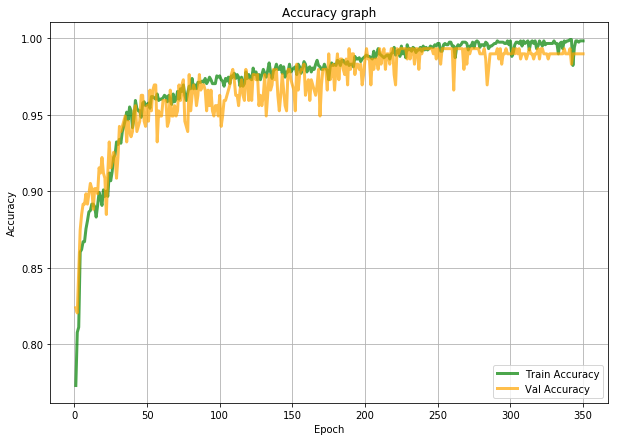

In [74]:
acc_graph(epochs, logs.history.get('acc'), logs.history.get('val_acc'))

In [54]:
train_preds = LSTM_model.predict(X_train)

NameError: name 'LSTM_model' is not defined

In [ ]:
for i in range(X_train.shape[0]):
    if train_preds[i] > 0.5:
        print(i)

In [94]:
train_preds = GRU_model.predict(X_test)
for i in range(X_test.shape[0]):
    print(train_preds[i]>0.5, i, train_preds[i],test[i])

[ True] 0 [0.9980488] [-0.377 -0.231 -0.2   -0.155  0.027  0.227]
[ True] 1 [0.9981012] [-0.377 -0.231 -0.2   -0.155  0.027  0.242]
[ True] 2 [0.9981629] [-0.377 -0.231 -0.2   -0.155  0.027  0.261]
[ True] 3 [0.9982167] [-0.377 -0.231 -0.2   -0.155  0.027  0.279]
[ True] 4 [0.99831736] [-0.377 -0.231 -0.2   -0.155  0.027  0.317]
[ True] 5 [0.99835485] [-0.377 -0.231 -0.2   -0.155  0.027  0.333]
[ True] 6 [0.9984464] [-0.377 -0.231 -0.2   -0.155  0.027  0.378]
[ True] 7 [0.9984876] [-0.377 -0.231 -0.2   -0.155  0.027  0.402]
[False] 8 [0.01129149] [-0.493 -0.493 -0.476 -0.46  -0.425  0.008]
[False] 9 [0.01158426] [-0.493 -0.493 -0.476 -0.46  -0.425  0.056]
[False] 10 [0.01160067] [-0.493 -0.493 -0.476 -0.46  -0.425  0.059]
[False] 11 [0.01174722] [-0.493 -0.493 -0.476 -0.46  -0.425  0.088]
[False] 12 [0.01177025] [-0.493 -0.493 -0.476 -0.46  -0.425  0.093]
[False] 13 [0.01180139] [-0.493 -0.493 -0.476 -0.46  -0.425  0.1  ]
[False] 14 [0.01182703] [-0.493 -0.493 -0.476 -0.46  -0.425  0.1

In [97]:
GRU_model.save_weights('sources/GRU_sequence_weights.h5')

In [ ]:
LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
logs = LSTM_model.fit(X_train, y_train , epochs=epochs, batch_size=batch_size, shuffle=True,\
               validation_data=(X_dev, y_dev), verbose=0, class_weight=class_weights_train)

# Final fit NN on all train set

In [ ]:
Tx=  6
Ty = 1
epochs = 250
batch_size = 32

In [ ]:
LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.fit(X, y , epochs=epochs, batch_size=batch_size, shuffle=True,\
               verbose=0, class_weight=class_weights)
LSTM_model.save_weights('sources/LSTM_sequence_weights.h5')

In [ ]:
print(LSTM_model.summary())
test_preds = LSTM_model.predict(X_test)

In [ ]:
for i in range(X_test.shape[0]):
    if test_preds[i] > 0.5:
        print(i)

In [ ]:
LSTM_model = model((Tx,1),Ty)
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.load_weights('sources/LSTM_sequence_weights.h5')

In [ ]:
test_preds = LSTM_model.predict(X_test)

for i in range(X_test.shape[0]):
    if test_preds[i] > 0.5:
        print(i)